In [1]:
# COMP5421
# Assignment 1-1
# Xiaopeng Pan (1129446)
# Jan 26, 2021
# Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

In [2]:
import numpy as np
import time
import random
import math
import matplotlib.pyplot as plt
import csv

In [4]:
# load the data
data_path = r'/content/drive/MyDrive/Colab Notebooks/data/dl_a1_dataset_c/Algerian_forest_fires_dataset_UPDATE_envoyé_27_08_2020.csv'
with open(data_path,encoding = 'utf-8') as f:
    line = np.loadtxt(f, str, delimiter = ";", skiprows = 0)

num_line=0
for i in range(len(line)):
  if line[i][0].isdigit():
    line_split = line[i].split(",")
    if num_line==0:  
      data_cleaned = np.zeros((11,1))    # store the features in columns, the last row is the class label; each column is a sample
      data_cleaned[0,0] = float(line_split[3])    # Temperature
      data_cleaned[1,0] = float(line_split[4])    # RH
      data_cleaned[2,0] = float(line_split[5])    # Ws
      data_cleaned[3,0] = float(line_split[6])    # Rain
      data_cleaned[4,0] = float(line_split[7])    # FFMC
      data_cleaned[5,0] = float(line_split[8])    # DMC
      data_cleaned[6,0] = float(line_split[9])    # DC
      data_cleaned[7,0] = float(line_split[10])   # ISI
      data_cleaned[8,0] = float(line_split[11])   # BUI
      data_cleaned[9,0] = float(line_split[12])   # FWI
      if "not" in line_split[13]:         # Classes
        data_cleaned[10,0] = 0  
      else:
        data_cleaned[10,0] = 1   
    else:
      tmp = np.zeros((11,1))    # store the features, the last row is the class label
      tmp[0,0] = float(line_split[3])    # Temperature
      tmp[1,0] = float(line_split[4])    # RH
      tmp[2,0] = float(line_split[5])    # Ws
      tmp[3,0] = float(line_split[6])    # Rain
      tmp[4,0] = float(line_split[7])    # FFMC
      tmp[5,0] = float(line_split[8])    # DMC
      tmp[6,0] = float(line_split[9])    # DC
      tmp[7,0] = float(line_split[10])   # ISI
      tmp[8,0] = float(line_split[11])   # BUI
      tmp[9,0] = float(line_split[12])   # FWI
      if "not" in line_split[13]:         # Classes
        tmp[10,0] = 0  
      else:
        tmp[10,0] = 1   
      data_cleaned = np.hstack((data_cleaned,tmp))
    num_line = num_line + 1

print("The first 10 lines of the csv data           :\n",line[:10])
print("The first 10 records of the cleaned data     :\n",data_cleaned[:,:10])

The first 10 lines of the csv data           :
 ['Bejaia Region Dataset '
 'day,month,year,Temperature, RH, Ws,Rain ,FFMC,DMC,DC,ISI,BUI,FWI,Classes  '
 '01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire   '
 '02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire   '
 '03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire   '
 '04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire   '
 '05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire   '
 '06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire   '
 '07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire   '
 '08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire   ']
The first 10 records of the cleaned data     :
 [[29.  29.  26.  25.  27.  31.  33.  30.  25.  28. ]
 [57.  61.  82.  89.  77.  67.  54.  73.  88.  79. ]
 [18.  13.  22.  13.  16.  14.  13.  15.  13.  12. ]
 [ 0.   1.3 13.1  2.5  0.   0.   0.   0.   0.2  0. ]
 [65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2]
 [ 3.4  4.1  2.5  1.3  3.   5.8  9.9 12.1  7.9

In [6]:
# method to shuffle a dataset
def shuffle_data(data_in):
  num_row = data_in.shape[0] # number of rows
  num_col = data_in.shape[1] # number of columns
  data_in_shuffled = np.zeros((num_row,num_col))
  index_col = list(range(num_col))
  # shuffle the column index
  random.shuffle(index_col)
  # generate shuffled data
  for _ in range(num_col):
    data_in_shuffled[:,_:_+1]=data_in[:,index_col[_]:index_col[_]+1]
  return data_in_shuffled

# the sigmoid method, x is the result of w*x
def sigmoid(x):
  return 1.0 / (1+np.exp(-x))

# the derivative of sigmoid,  x is the result of w*x
def d_sigmoid(x):
  return np.exp(-x) / ((1+np.exp(-x))**2)

In [7]:
# normalize the data:
data = shuffle_data(data_cleaned)
print("Before normalization, the first 5 records are:\n",data[:,0:5])
mean = data[0:data.shape[0]-1,:].mean(axis=1) # axis=1, left to right
mean = mean.reshape(mean.shape[0],-1)
mean = np.vstack([mean,np.array([0])])
data_normalized = data - mean
data_normalized_abs = np.abs(data_normalized)
max = data_normalized_abs.max(axis=1)
max = max.reshape(max.shape[0],-1)
data_normalized = data_normalized / max

print("After normalization, the first 5 records are:")
print(data_normalized[:,0:5])

Before normalization, the first 5 records are:
 [[ 31.   31.   34.   36.   34. ]
 [ 67.   64.   64.   53.   71. ]
 [ 14.   15.   16.   16.   14. ]
 [  0.    0.    0.    0.    6.5]
 [ 82.6  86.7  89.4  89.5  64.5]
 [  5.8  14.2  50.2  37.6   3.3]
 [ 22.2  63.8 210.4 161.5   9.1]
 [  3.1   5.7   7.3  10.4   1. ]
 [  7.   18.3  62.9  47.5   3.5]
 [  2.5   8.4  19.9  22.3   0.4]
 [  1.    1.    1.    1.    0. ]]
After normalization, the first 5 records are:
[[-0.11522965 -0.11522965  0.1796938   0.37630943  0.1796938 ]
 [ 0.123636    0.05035539  0.05035539 -0.21834017  0.22134348]
 [-0.11144853 -0.03735196  0.03674461  0.03674461 -0.11144853]
 [-0.04742437 -0.04742437 -0.04742437 -0.04742437  0.35782911]
 [ 0.09560792  0.17879297  0.23357336  0.23560227 -0.27162362]
 [-0.1732177  -0.00924052  0.69351884  0.44755306 -0.22202043]
 [-0.15830645  0.08480934  0.94155871  0.65578078 -0.23486454]
 [-0.11656018  0.06602199  0.17838025  0.39607437 -0.26403039]
 [-0.18846667  0.03169191  0.90063639 

In [8]:
# split train and test sets
num_tr=int(0.9*data_normalized.shape[1])       # assign 90% of the data to the train set
num_te=data_normalized.shape[1]-num_tr

data_train = data_normalized[:,:num_tr]                # data set for training
data_test = data_normalized[:,num_tr:]

print("The first 5 records of the train set:")
print(data_train[:,0:5])
print("The first 5 records of the test set:")
print(data_test[:,0:5])

The first 5 records of the train set:
[[-0.11522965 -0.11522965  0.1796938   0.37630943  0.1796938 ]
 [ 0.123636    0.05035539  0.05035539 -0.21834017  0.22134348]
 [-0.11144853 -0.03735196  0.03674461  0.03674461 -0.11144853]
 [-0.04742437 -0.04742437 -0.04742437 -0.04742437  0.35782911]
 [ 0.09560792  0.17879297  0.23357336  0.23560227 -0.27162362]
 [-0.1732177  -0.00924052  0.69351884  0.44755306 -0.22202043]
 [-0.15830645  0.08480934  0.94155871  0.65578078 -0.23486454]
 [-0.11656018  0.06602199  0.17838025  0.39607437 -0.26403039]
 [-0.18846667  0.03169191  0.90063639  0.60059727 -0.25665738]
 [-0.18914866  0.05616522  0.53431941  0.6341081  -0.27646377]
 [ 1.          1.          1.          1.          0.        ]]
The first 5 records of the test set:
[[-0.21353747 -0.31184529 -0.70507655 -0.11522965 -1.        ]
 [ 0.27019722 -0.1206327   0.66102713  0.51446591  0.58774652]
 [ 0.11084118 -0.11144853 -0.1855451   0.11084118 -0.03735196]
 [ 0.00868765 -0.04742437  0.10844235 -0.0

Training in Process:
--------------------------------------------------------------------------------
Epoch # 1 Accuracy: 0.5570776255707762 mse: 0.41469946744198255 True: 1 Prediction: 1
Epoch # 2 Accuracy: 0.5570776255707762 mse: 0.40378072363973355 True: 1 Prediction: 1
Epoch # 3 Accuracy: 0.5570776255707762 mse: 0.3825907766724063 True: 0 Prediction: 1
Epoch # 4 Accuracy: 0.5570776255707762 mse: 0.33835382512093326 True: 0 Prediction: 1
Epoch # 5 Accuracy: 0.5570776255707762 mse: 0.2773066996224958 True: 0 Prediction: 1
Epoch # 6 Accuracy: 0.5570776255707762 mse: 0.2512372051488025 True: 1 Prediction: 1
Epoch # 7 Accuracy: 0.5570776255707762 mse: 0.24801897314761295 True: 0 Prediction: 1
Epoch # 8 Accuracy: 0.5570776255707762 mse: 0.24777182422268537 True: 0 Prediction: 1
Epoch # 9 Accuracy: 0.5570776255707762 mse: 0.24774840733795644 True: 0 Prediction: 1
Epoch # 10 Accuracy: 0.5570776255707762 mse: 0.2477433604513287 True: 1 Prediction: 1
Epoch # 11 Accuracy: 0.5570776255707762 m

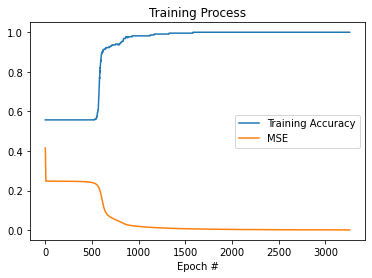

In [13]:
# method to train the MLP model for classification problem
def mlp_train(data_train):
  # initialization of the MLP model
  num_in = data_train.shape[0]-1
  num_hd_1 = 5          # number of neurons in the 1st hidden layer
  num_hd_2 = 5
  num_hd_3 = 5
  num_out = 1
  num_epoch = 10000
  mse_ = 1
  mse_thres = 1e-3
  epoch = 1
  alpha = 1
  eta1 = 0.01
  eta2 = 0.01
  eta3 = 0.01
  eta4 = 0.01

  # initialize weights  
  w_1_1 = np.random.rand(num_hd_1,num_in+1)     # the weights between input layer and the 1st hidden layer, size: num_hd_1 x (num_in + 1)
  dw_0_1 = np.zeros((num_hd_1,num_in+1))        # delta weights for w_1_1
  w_1_2 = np.random.rand(num_hd_2,num_hd_1+1)   # the weights between the 1st hidden layer and the 2nd hidden layer, size: num_hd_2 x (num_hd_1 + 1)
  dw_0_2 = np.zeros((num_hd_2,num_hd_1+1))      # delta weights for w_1_2
  w_1_3 = np.random.rand(num_hd_3,num_hd_2+1)   # the weights between the 2nd hidden layer and the 3rd hidden layer, size: num_hd_3 x (num_hd_2 + 1)
  dw_0_3 = np.zeros((num_hd_3,num_hd_2+1))      # delta weights for w_1_3
  w_1_4 = np.random.rand(num_out,num_hd_3+1)    # the weights between the 3rd hidden layer and the output layer, size: num_out x (num_hd_3 + 1)
  dw_0_4 = np.zeros((num_out,num_hd_3+1))       # delta weights for w_1_4       

  # training start time
  time_st = time.time()

  print("Training in Process:")
  print("-"*80)

  acc = []
  mse = []
  while mse_ > mse_thres and epoch <= num_epoch:
    print("Epoch # {}".format(epoch),end="")

    # shuffle the training data for every epoch
    # data_train = shuffle_data(data_train)

    # use all the data for training in this epoch
    out = []
    err = []
    test_index = random.randint(1,data_train.shape[1])     # randomly select one sample to print
    for i in range(data_train.shape[1]):
      # forward computation
      x = np.vstack([data_train[0:num_in,i].reshape(num_in,-1),np.array([1])])    # fetch input data
      d = data_train[num_in,i]                                                    # fetch desired response
      hd_1 = np.vstack([sigmoid(np.dot(w_1_1,x)),np.array([[1]])])                # calculate outputs
      hd_2 = np.vstack([sigmoid(np.dot(w_1_2,hd_1)),np.array([[1]])])            
      hd_3 = np.vstack([sigmoid(np.dot(w_1_3,hd_2)),np.array([[1]])])            
      o = sigmoid(np.dot(w_1_4,hd_3))                                             
      e = d - o                                                                   # calculate error
      err.append(e)
      
      # backward computation
      delta_out = e*d_sigmoid(np.dot(w_1_4,hd_3))                                         # calculate error signals
      delta_hd_3 = d_sigmoid(np.dot(w_1_3,hd_2))*(np.dot(w_1_4[:,:-1].T,delta_out))
      delta_hd_2 = d_sigmoid(np.dot(w_1_2,hd_1))*(np.dot(w_1_3[:,:-1].T,delta_hd_3))
      delta_hd_1 = d_sigmoid(np.dot(w_1_1,x))*(np.dot(w_1_2[:,:-1].T,delta_hd_2))
      
      dw_1_1 = eta1*np.dot(delta_hd_1,x.T)            # calculate gradients
      dw_1_2 = eta2*np.dot(delta_hd_2,hd_1.T)
      dw_1_3 = eta3*np.dot(delta_hd_3,hd_2.T)
      dw_1_4 = eta4*np.dot(delta_out,hd_3.T)

      w_2_1 = w_1_1 + alpha*dw_0_1 + dw_1_1           # update weights
      w_2_2 = w_1_2 + alpha*dw_0_2 + dw_1_2
      w_2_3 = w_1_3 + alpha*dw_0_3 + dw_1_3
      w_2_4 = w_1_4 + alpha*dw_0_4 + dw_1_4

      # move weights one-step
      dw_0_1 = dw_1_1
      dw_0_2 = dw_1_2
      dw_0_3 = dw_1_3
      dw_0_4 = dw_1_4
      w_1_1 = w_2_1
      w_1_2 = w_2_2
      w_1_3 = w_2_3
      w_1_4 = w_2_4

      # assign the discrete outputs
      if o.item((0,0))>=0.5:
        o_ = 1
      else:
        o_ = 0
      out.append(o_)

      # assign the randomly selected output to print
      if i == test_index:
        test_d = int(d)
        test_o = o_
    
    # caculate the accuracy
    train_acc = [(out[i]==int(data_train[num_in,i])) for i in range(data_train.shape[1])]
    acc.append(sum(train_acc)/len(train_acc))

    # calculate the MSE
    sum_err = 0
    for e in err:
      sum_err += np.sum(np.power(e,2))
    mse_ = sum_err/ len(err)
    mse.append(sum_err/ len(err))
    
    print(" Accuracy: {} mse: {} True: {} Prediction: {}".format(acc[-1],mse[-1],test_d,test_o))
    epoch += 1

  print("-"*80)
  print("Points traind          : {}".format(i+1))
  print("Epochs conducted       : {}".format(epoch-1))
  print("Final MSE              : {}".format(mse[-1]))
  print("Training time (sec)    : {}".format(time.time()-time_st))

  # plot the training process
  epoch_ = [i for i in range(1,epoch)]
  plt.plot(epoch_,acc,label='Training Accuracy')
  plt.plot(epoch_,mse,label='MSE')
  plt.title('Training Process')
  plt.xlabel('Epoch #')
  plt.legend()
  plt.show()
  
  return w_1_1, w_1_2, w_1_3, w_1_4

# train the model and return parameters
w_1_1, w_1_2, w_1_3, w_1_4 = mlp_train(data_train)


In [14]:
# method to test the MLP model for classification problem
def mlp_test(data_test,w_1_1,w_1_2,w_1_3,w_1_4):
  
  num_in = data_test.shape[0]-1
  out = []
  err = []
  time_st = time.time()

  print("Testing in Process:")
  print("-"*80)
  for i in range(data_test.shape[1]):
    # forward computation
    x = np.vstack([data_test[0:num_in,i].reshape(num_in,-1),np.array([1])])   # fetch input data
    d = data_test[num_in,i]                                                   # fetch desired response
    hd_1 = np.vstack([sigmoid(np.dot(w_1_1,x)),np.array([[1]])])              # calculate the 1st hidden layer output
    hd_2 = np.vstack([sigmoid(np.dot(w_1_2,hd_1)),np.array([[1]])])  
    hd_3 = np.vstack([sigmoid(np.dot(w_1_3,hd_2)),np.array([[1]])])  
    o = sigmoid(np.dot(w_1_4,hd_3))                                          
    e = d - o                                                                 # calculate error
    err.append(e)

    if o.item((0,0))>=0.5:
      o_ = 1
    else:
      o_ = 0
    out.append(o_)

    print("True: {} Prediction: {}".format(int(d),o_))

  test_acc_list = [(out[i]==int(data_test[num_in,i])) for i in range(data_test.shape[1])]
  test_acc = sum(test_acc_list)/len(test_acc_list)
  sum_err = 0
  for e in err:
    sum_err += np.sum(np.power(e,2))
  mse = sum_err/ len(err)
  
  print("-"*80)
  print("Testing Accuracy       : {}".format(test_acc))
  print("Points tested          : {}".format(i+1))
  print("MSE                    : {}".format(mse))
  print("Testing time (sec)     : {}".format(time.time()-time_st))

mlp_test(data_test,w_1_1, w_1_2, w_1_3, w_1_4)

Testing in Process:
--------------------------------------------------------------------------------
True: 0 Prediction: 0
True: 1 Prediction: 1
True: 0 Prediction: 0
True: 1 Prediction: 1
True: 0 Prediction: 0
True: 1 Prediction: 1
True: 0 Prediction: 0
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 1 Prediction: 0
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 0 Prediction: 0
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 0 Prediction: 0
True: 0 Prediction: 0
True: 0 Prediction: 0
True: 0 Prediction: 0
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 1 Prediction: 1
True: 1 Prediction: 1
--------------------------------------------------------------------------------
Testing Accuracy       : 0.96
Points tested          : 25
MSE                    : 0.027111319730208586
Testing time (sec)     : 0.010524511337280273
